Class Labels

Number of Doctors Visited: The total count of different doctors the patient has seen = {
 1: 0-1 doctors
 2: 2-3 doctors
 3: 4 or more doctors
}

Age: The patient's age group = {
 1: 50-64
 2: 65-80
}

Physical Health: A self-assessment of the patient's physical well-being = {
 -1: Refused
 1: Excellent
 2: Very Good
 3: Good
 4: Fair
 5: Poor
}

Mental Health: A self-evaluation of the patient's mental or psychological health = {
 -1: Refused
 1: Excellent
 2: Very Good
 3: Good
 4: Fair
 5: Poor
}

Dental Health: A self-assessment of the patient's oral or dental health= {
 -1: Refused
 1: Excellent
 2: Very Good
 3: Good
 4: Fair
 5: Poor
}

Employment: The patient's employment status or work-related information = {
 -1: Refused 6
 1: Working full-time
 2: Working part-time
 3: Retired
 4: Not working at this time
}

Stress Keeps Patient from Sleeping: Whether stress affects the patient's ability to sleep = {
 0: No
 1: Yes
}

Medication Keeps Patient from Sleeping: Whether medication impacts the patient's sleep = {
 0: No
 1: Yes
}

Pain Keeps Patient from Sleeping: Whether physical pain disturbs the patient's sleep = {
 0: No
 1: Yes
}

Bathroom Needs Keeps Patient from Sleeping: Whether the need to use the bathroom affects the patient's sleep = {
 0: No
 1: Yes
}

Unknown Keeps Patient from Sleeping: Unidentified factors affecting the patient's sleep = {
 0: No
 1: Yes
}

Trouble Sleeping: General issues or difficulties the patient faces with sleeping = {
 0: No
 1: Yes
}

Prescription Sleep Medication: Information about any sleep medication prescribed to the patient = {
 -1: Refused
 1: Use regularly
 2: Use occasionally
 3: Do not use
}

Race: The patient's racial or ethnic background = {
 -2: Not asked
 -1: REFUSED
 1: White, Non-Hispanic
 2: Black, Non-Hispanic
 3: Other, Non-Hispanic
 4: Hispanic
 5: 2+ Races, Non-Hispanic
}
Gender: The gender identity of the patient = {
 -2: Not asked
 -1: REFUSED
 1: Male
 2: Female
}

In [ ]:
!pip install scikit-optimize

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
df = pd.read_csv('/content/NPHA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [ ]:
df.shape

(714, 15)

In [ ]:
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


In [ ]:
print(df.head(6))

   Number of Doctors Visited  Age  Phyiscal Health  Mental Health  \
0                          3    2                4              3   
1                          2    2                4              2   
2                          3    2                3              2   
3                          1    2                3              2   
4                          3    2                3              3   
5                          2    2                3              2   

   Dental Health  Employment  Stress Keeps Patient from Sleeping  \
0              3           3                                   0   
1              3           3                                   1   
2              3           3                                   0   
3              3           3                                   0   
4              3           3                                   1   
5              4           3                                   0   

   Medication Keeps Patient from Sleepi

In [ ]:
df.isnull().sum()

# Filter out the rows with values -1 or -2 in the features.
for _, col in enumerate(df.columns):
    count = df[col].isin([-1, -2]).sum()
    print(col, count)


Number of Doctors Visited 0
Age 0
Phyiscal Health 1
Mental Health 10
Dental Health 4
Employment 0
Stress Keeps Patient from Sleeping 0
Medication Keeps Patient from Sleeping 0
Pain Keeps Patient from Sleeping 0
Bathroom Needs Keeps Patient from Sleeping 0
Uknown Keeps Patient from Sleeping 0
Trouble Sleeping 2
Prescription Sleep Medication 3
Race 0
Gender 0


In [ ]:
class_distribution = df['Number of Doctors Visited'].value_counts()
print(class_distribution)

Number of Doctors Visited
2    372
3    211
1    131
Name: count, dtype: int64


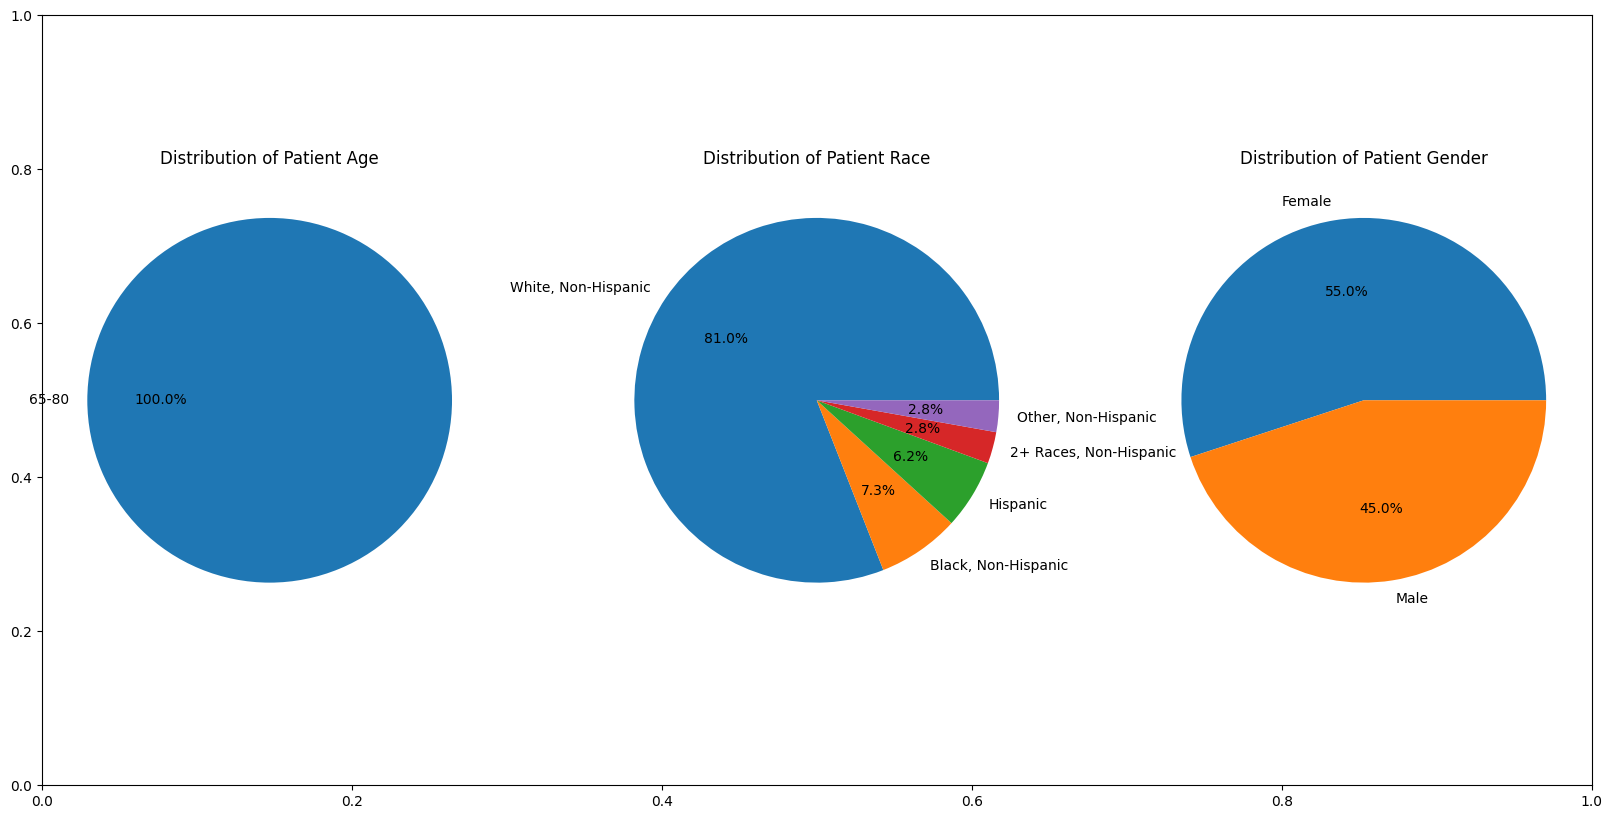

In [ ]:
df_ = df.copy()

age_dict = { 1: "50-64", 2: "65-80" }
df_['Age'] = df_['Age'].map(age_dict)

race_dict = { 1: "White, Non-Hispanic", 2: "Black, Non-Hispanic", 3: "Other, Non-Hispanic", 4: "Hispanic", 5: "2+ Races, Non-Hispanic" }
df_['Race'] = df_['Race'].map(race_dict)

gender_dict = { 1: "Male", 2: "Female" }
df_['Gender'] = df_['Gender'].map(gender_dict)

plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Age', 'Race' , 'Gender']):
    plt.subplot(1, 3, i + 1)

    x = df_[col].value_counts()
    plt.title('Distribution of Patient ' + col)
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


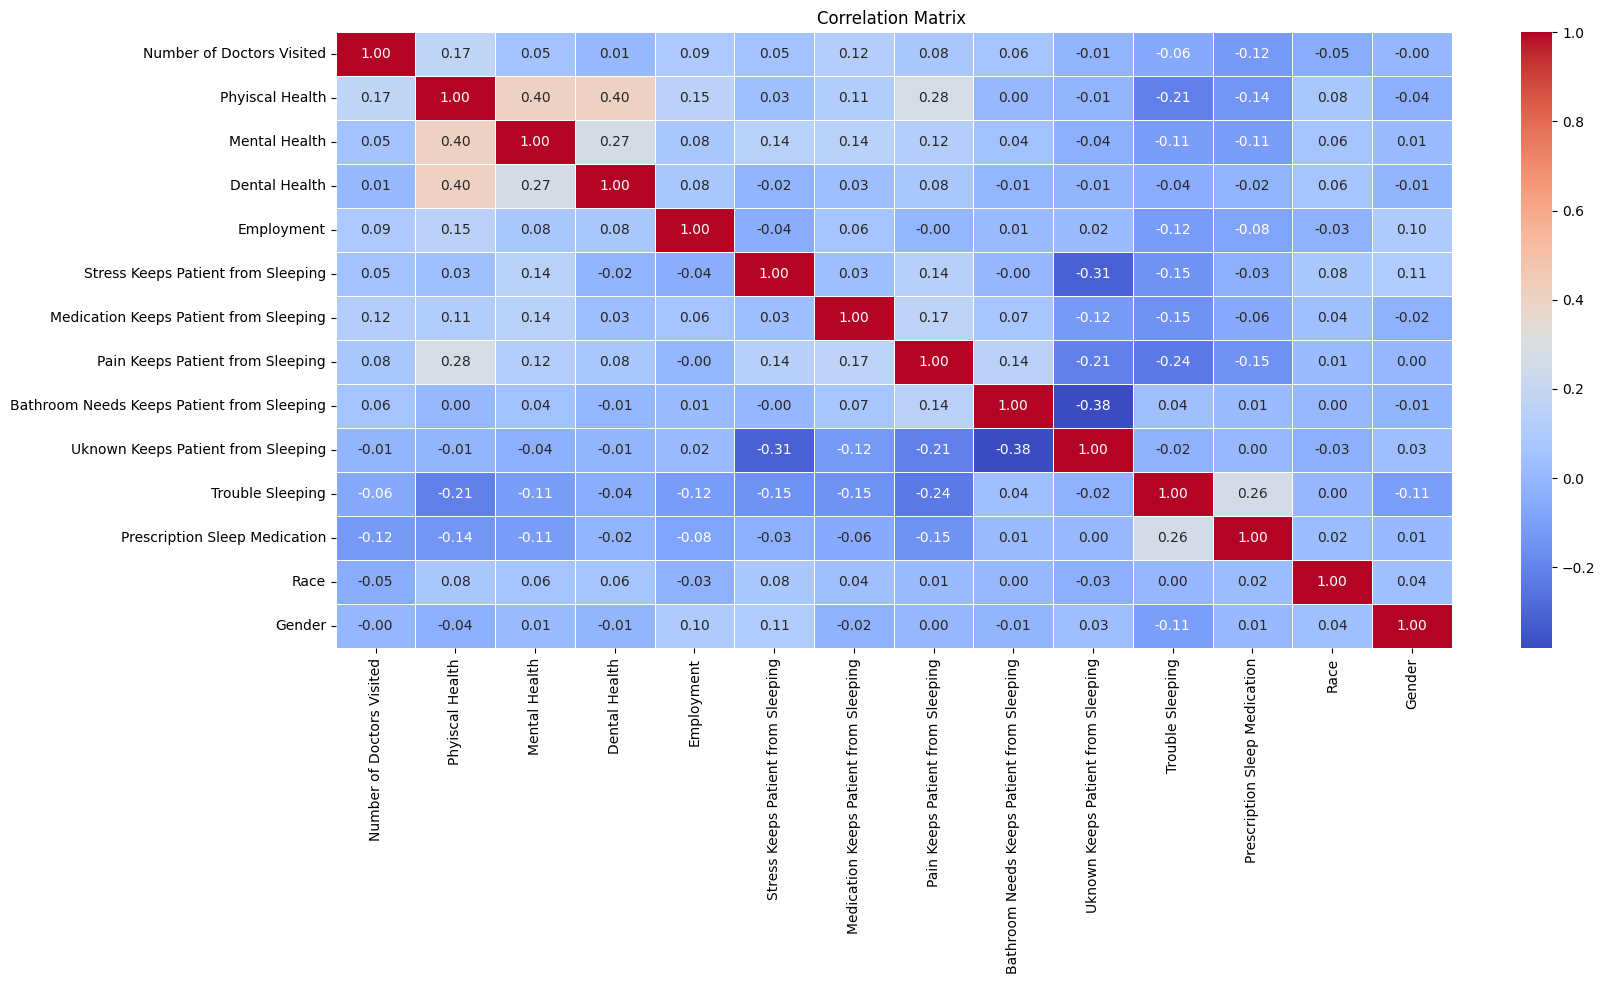

In [ ]:
df = df.drop('Age', axis=1)

corr_matrix = df.corr()
# heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix ")
plt.show()

<Figure size 1000x600 with 0 Axes>

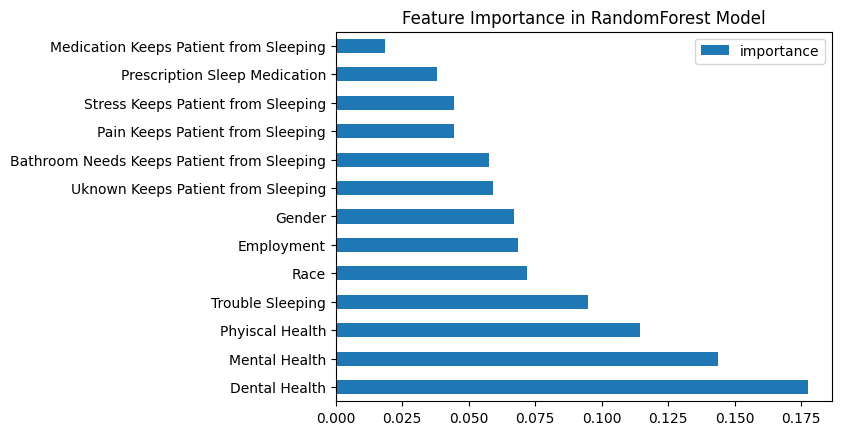

In [ ]:
X = df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importance in RandomForest Model')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({3: 298, 2: 298, 1: 298})


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Confusion Matrix:\n", matrix)
    print("Classification Report:\n", class_report)

In [ ]:
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
y = np.concatenate((y_train_resampled, y_test))

# Initializing Models
models = {
    "LogisticRegression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(kernel ='linear'),
    "DecisionTree": DecisionTreeClassifier()
}

cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]

    # Evaluate the model's accuracy using cross-validation
    accuracies = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

    print("*", model_name)
    print("Average accuracy:", np.mean(accuracies))

    model.fit(X_train_scaled, y_train_resampled)
    evaluate(model, X_test_scaled, y_test)

* LogisticRegression
Average accuracy: 0.44253174010455565
Confusion Matrix:
 [[ 5 15  8]
 [19 26 29]
 [10 15 16]]
Classification Report:
               precision    recall  f1-score   support

           1       0.15      0.18      0.16        28
           2       0.46      0.35      0.40        74
           3       0.30      0.39      0.34        41

    accuracy                           0.33       143
   macro avg       0.30      0.31      0.30       143
weighted avg       0.36      0.33      0.34       143

* Random Forest
Average accuracy: 0.5958831217326364
Confusion Matrix:
 [[ 4 11 13]
 [ 8 43 23]
 [ 3 21 17]]
Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.14      0.19        28
           2       0.57      0.58      0.58        74
           3       0.32      0.41      0.36        41

    accuracy                           0.45       143
   macro avg       0.39      0.38      0.37       143
weighted avg       0.

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestClassifier


search_spaces = {
    'bootstrap': [False],
    'n_estimators': Integer(10, 100),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(3, 10),
    'min_samples_leaf': Integer(2, 5)
}


bayes_cv = BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=search_spaces,
    n_iter=20,
    cv=3,
    n_jobs=-1,  # Utilize all available cores for parallel processing
    scoring='accuracy',
    random_state=42
)


# Fit the optimizer to data using the resampled target variable
bayes_cv.fit(X_train_scaled, y_train_resampled)
print("Train score: %s" % bayes_cv.best_score_)
print("Best params: %s" % str(bayes_cv.best_params_))

rf = bayes_cv.best_estimator_
evaluate(rf, X_test_scaled, y_test)

Train score: 0.5749440715883669
Best params: OrderedDict([('bootstrap', False), ('max_depth', 10), ('min_samples_leaf', 2), ('min_samples_split', 3), ('n_estimators', 83)])
Confusion Matrix:
 [[ 6 11 11]
 [13 36 25]
 [ 3 22 16]]
Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.21      0.24        28
           2       0.52      0.49      0.50        74
           3       0.31      0.39      0.34        41

    accuracy                           0.41       143
   macro avg       0.37      0.36      0.36       143
weighted avg       0.41      0.41      0.41       143



In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.svm import SVC

search_space = {
    'C': Real(1e-3, 1e+3, prior='log-uniform'),
    'gamma': Real(1e-3, 1e+0, prior='log-uniform'),
    'kernel': Categorical(['rbf'])
}

bayes_cv = BayesSearchCV(
    estimator=SVC(),
    search_spaces=search_space,
    scoring='accuracy',
    cv=3,
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

bayes_cv.fit(X_train_scaled, y_train_resampled)


print("Train score: %s" % bayes_cv.best_score_)
print("Best params: %s" % str(bayes_cv.best_params_))

evaluate(bayes_cv.best_estimator_, X_test_scaled, y_test)

Train score: 0.5548098434004475
Best params: OrderedDict([('C', 1000.0), ('gamma', 1.0), ('kernel', 'rbf')])
Confusion Matrix:
 [[ 5  9 14]
 [21 36 17]
 [ 5 19 17]]
Classification Report:
               precision    recall  f1-score   support

           1       0.16      0.18      0.17        28
           2       0.56      0.49      0.52        74
           3       0.35      0.41      0.38        41

    accuracy                           0.41       143
   macro avg       0.36      0.36      0.36       143
weighted avg       0.42      0.41      0.41       143



In [ ]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from sklearn.tree import DecisionTreeClassifier


search_spaces = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 5),
    'min_samples_leaf': Integer(1, 3)
}

bayes_cv = BayesSearchCV(
    estimator=DecisionTreeClassifier(),
    search_spaces=search_spaces,
    n_iter=20,
    cv=3,
    n_jobs=-1,  # Utilize all available cores for parallel processing
    scoring='accuracy',
    random_state=42
)


bayes_cv.fit(X_train_scaled, y_train_resampled)
print("Train score: %s" % bayes_cv.best_score_)
print("Best params: %s" % str(bayes_cv.best_params_))

evaluate(bayes_cv.best_estimator_, X_test_scaled, y_test)

Train score: 0.5123042505592842
Best params: OrderedDict([('criterion', 'entropy'), ('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 2)])
Confusion Matrix:
 [[ 6 15  7]
 [21 36 17]
 [10 20 11]]
Classification Report:
               precision    recall  f1-score   support

           1       0.16      0.21      0.18        28
           2       0.51      0.49      0.50        74
           3       0.31      0.27      0.29        41

    accuracy                           0.37       143
   macro avg       0.33      0.32      0.32       143
weighted avg       0.38      0.37      0.38       143



<Figure size 1000x600 with 0 Axes>

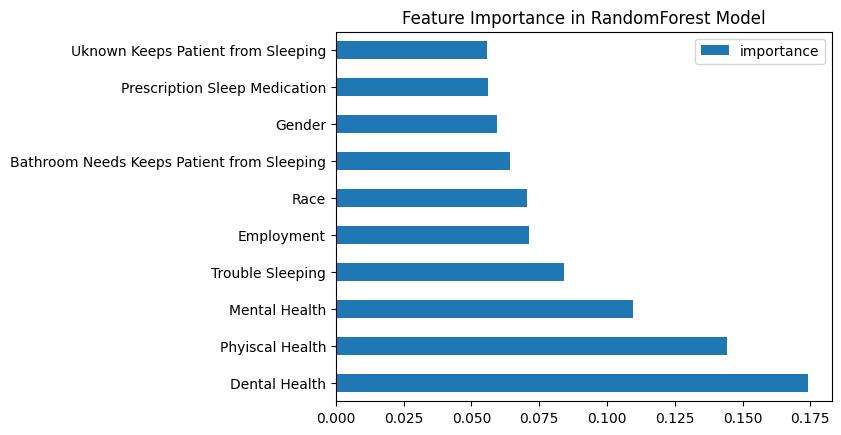

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')  # Top 10 features
plt.title('Feature Importance in RandomForest Model')
plt.show()